In [1]:
import heeps
from heeps.util.freq_decomp import temporal
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


std=1.0


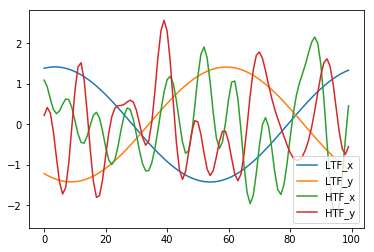

In [2]:
# temporal series
t_max = 10 # s
dt = 0.1 # s
fc = 0.01 # Hz
LTF_x = temporal(t_max, dt, 0, fc, seed=409566); plot(LTF_x, label='LTF_x')
LTF_y = temporal(t_max, dt, 0, fc, seed=224788); plot(LTF_y, label='LTF_y')
HTF_x = temporal(t_max, dt, fc, 1, seed=409566); plot(HTF_x, label='HTF_x')
HTF_y = temporal(t_max, dt, fc, 1, seed=224788); plot(HTF_y, label='HTF_y')
legend()
print('std=%s'%std(LTF_x))

(100, 2)


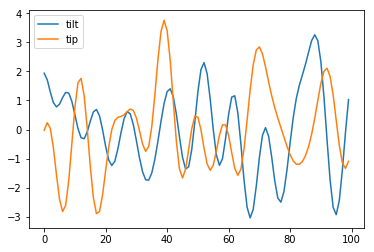

In [3]:
# create pointing errors (zernikes [2,3])
point_QSTA = np.array([LTF_x, LTF_y]).T/np.sqrt(2) # in xy
point_DYN = np.array([HTF_x, HTF_y]).T/np.sqrt(2) # in xy
point_ALL = point_QSTA*0.4 + point_DYN*2      # factors in mas  
plot(point_ALL[:,0], label='tilt')
plot(point_ALL[:,1], label='tip')
legend()
#fits.writeto('point_all_%ss_%sms.fits'%(t_max, round(dt*1e3)), np.float32(point_ALL))
fits.writeto('point_all_%ss_%sms.fits'%(t_max, round(dt*1e3)), np.float32(point_ALL), overwrite=True)
print(point_ALL.shape)